In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
file_path = 'C:/Users/HP/Desktop/New folder/heart+disease/processed.cleveland.data'
data = pd.read_csv(file_path)
data.head()


,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
df = data.replace("?", np.nan)
df = data.apply(pd.to_numeric, errors="coerce")

In [4]:
df = df.dropna()

In [5]:
print(df.columns)


Index(['63.0', '1.0', '1.0.1', '145.0', '233.0', '1.0.2', '2.0', '150.0',
       '0.0', '2.3', '3.0', '0.0.1', '6.0', '0'],
      dtype='object')


In [6]:
columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang",
    "oldpeak","slope","ca","thal","num"
]

In [7]:
# Assign proper column names
df.columns = columns

# Create binary target: 0 = no disease, 1 = disease
df["target"] = (df["num"] > 0).astype(int)

# Separate features and target
X = df.drop(columns=["num", "target"])
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (236, 13) Test shape: (60, 13)


=== Logistic Regression ===
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[30  2]
 [ 6 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.92      0.79      0.85        28

    accuracy                           0.87        60
   macro avg       0.88      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60


=== Random Forest ===
Accuracy: 0.8166666666666667
Confusion Matrix:
 [[27  5]
 [ 6 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



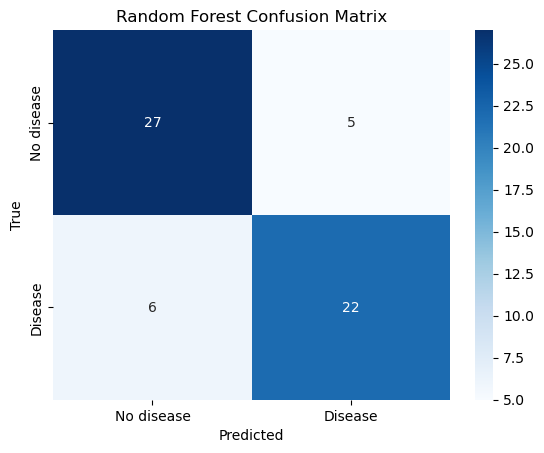

In [8]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_log = log_reg.predict(X_test)
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test)
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Optional: Confusion matrix heatmap for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No disease", "Disease"],
            yticklabels=["No disease", "Disease"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [10]:
import gradio as gr
import numpy as np

def predict(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang,
            oldpeak, slope, ca, thal):
    data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                      exang, oldpeak, slope, ca, thal]])
    pred = model.predict(data)[0]
    return "Disease" if pred == 1 else "No Disease"

inputs = [
    gr.Number(label="Age"), gr.Number(label="Sex"), gr.Number(label="Chest Pain Type"),
    gr.Number(label="Resting BP"), gr.Number(label="Cholesterol"), gr.Number(label="FBS"),
    gr.Number(label="Rest ECG"), gr.Number(label="Max HR"), gr.Number(label="Exercise Angina"),
    gr.Number(label="Oldpeak"), gr.Number(label="Slope"), gr.Number(label="CA"), gr.Number(label="Thal")
]

demo = gr.Interface(fn=predict, inputs=inputs, outputs="text", title="Heart Disease Predictor")
demo.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [12]:
from fastapi import FastAPI
from pydantic import BaseModel
import uvicorn

app = FastAPI()

class Patient(BaseModel):
    age: float; sex: float; cp: float; trestbps: float; chol: float
    fbs: float; restecg: float; thalach: float; exang: float
    oldpeak: float; slope: float; ca: float; thal: float

@app.post("/predict")
def predict(patient: Patient):
    data = [[patient.age, patient.sex, patient.cp, patient.trestbps, patient.chol,
             patient.fbs, patient.restecg, patient.thalach, patient.exang,
             patient.oldpeak, patient.slope, patient.ca, patient.thal]]
    pred = model.predict(data)[0]
    return {"prediction": "Disease" if pred == 1 else "No Disease"}

# Run with: uvicorn filename:app --reload


In [13]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    values = [[data["age"], data["sex"], data["cp"], data["trestbps"], data["chol"],
               data["fbs"], data["restecg"], data["thalach"], data["exang"],
               data["oldpeak"], data["slope"], data["ca"], data["thal"]]]
    pred = model.predict(values)[0]
    return jsonify({"prediction": "Disease" if pred == 1 else "No Disease"})

# Run with: flask run
